In [23]:
pip install numpy matplotlib pandas scikit-learn seaborn statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 8.7 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 11.0 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Supervised learning from data: Regression

### Linear regression for one dimensional data

In [14]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

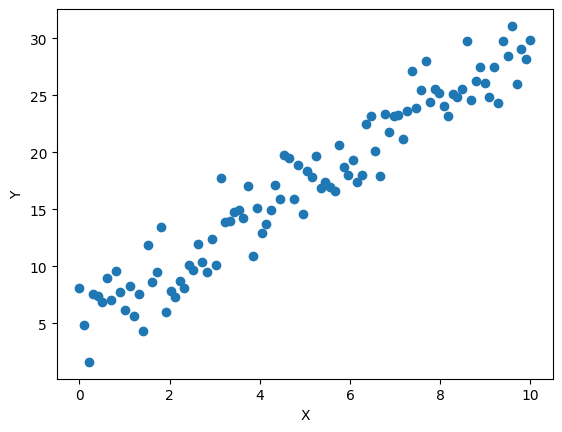

In [15]:
num_points = 100
a = 2.5
b = 5

x = np.linspace(0, 10, num_points)
y = a * x + b + np.random.normal(0, 2.0, num_points)

plt.scatter(x, y)
plt.xlabel("X"), plt.ylabel("Y"), plt.title("")
plt.show()

Closed-Form Solution

In [16]:
X = np.vstack((x, np.ones_like(x))).T  # append constant vector
y_ = y.reshape(-1, 1)  # column vector

theta = np.linalg.inv(X.T @ X) @ X.T @ y_  # theta = (X^T X)^-1 X^T y
w_1, w_0 = theta.flatten() # a, b
w_1, w_0

(np.float64(2.459381929188079), np.float64(4.950797742707602))

In [17]:
cov_xy = np.cov(x, y, bias=True)[0, 1]  # Covariance
var_x = np.var(x)  # Variance

w_1 = cov_xy / var_x # a, slope
w_0 = np.mean(y) - w_1 * np.mean(x) # b, intercept
w_1, w_0

(np.float64(2.4593819291880807), np.float64(4.950797742707596))

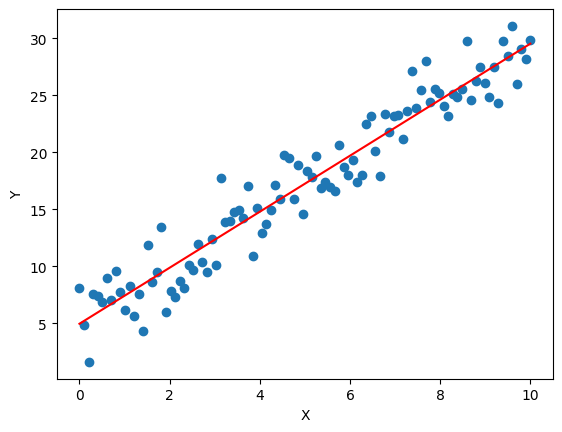

In [18]:
plt.scatter(x, y)
plt.plot(x, w_1 * x + w_0, color='red')
plt.xlabel("X"), plt.ylabel("Y"), plt.title("")
plt.show()

Residuals Analysis - is linear regression the right tool?

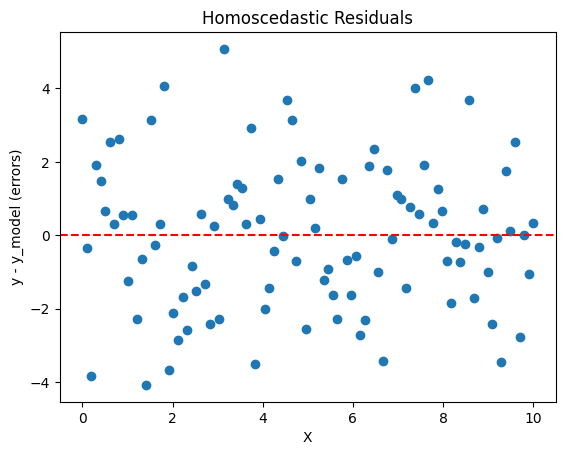

In [19]:
y_model = w_1 * x + w_0
residuals = y - y_model


plt.scatter(x, residuals,)
plt.axhline(0, color='red', linestyle='--')  # Line at zero
plt.xlabel("X")
plt.ylabel("y - y_model (errors)")
plt.title("Homoscedastic Residuals")
plt.show()

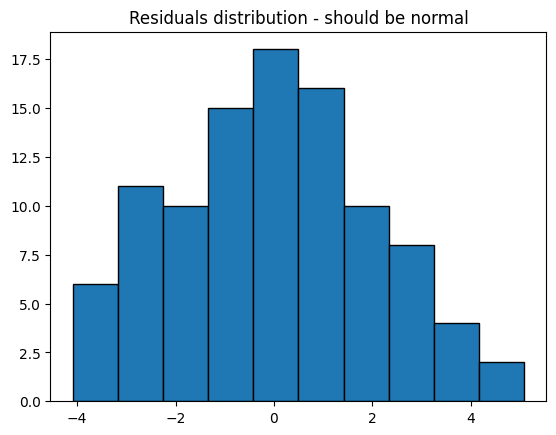

In [20]:
plt.hist(residuals, edgecolor='black')
plt.title("Residuals distribution - should be normal")
plt.show()

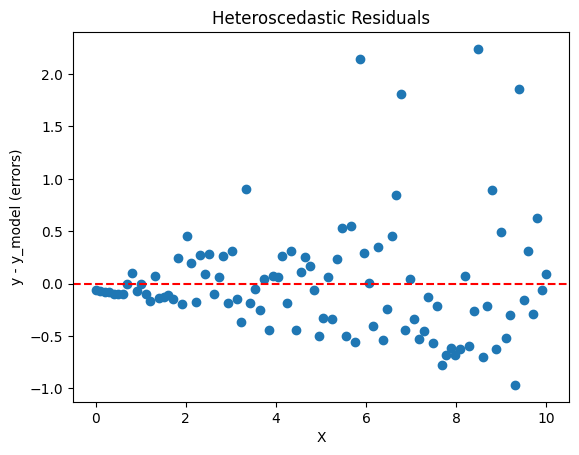

In [21]:
x = np.linspace(0, 10, num_points)
y = a * x + b + np.random.exponential(scale=0.1*x)  # Exponential error distribution

w_1 = np.cov(x, y, bias=True)[0, 1] / np.var(x)
w_0 = np.mean(y) - w_1 * np.mean(x)
residuals = y - (w_1 * x + w_0)

plt.scatter(x, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("y - y_model (errors)")
plt.title("Heteroscedastic Residuals")
plt.show()

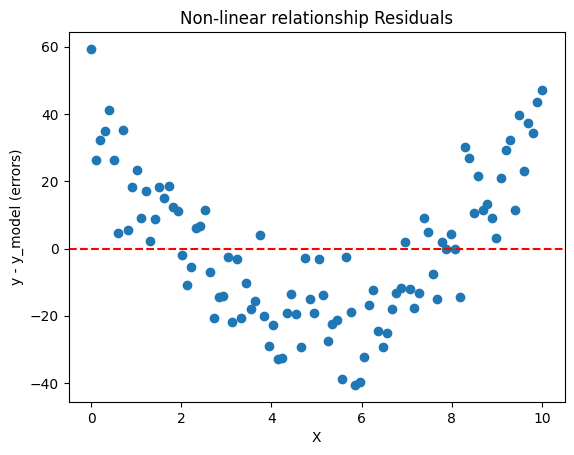

In [12]:
x = np.linspace(0, 10, num_points)
y = a * x **2 + b +  np.random.normal(0, 10.0, num_points)  # x^2

w_1 = np.cov(x, y, bias=True)[0, 1] / np.var(x)
w_0 = np.mean(y) - w_1 * np.mean(x)
residuals = y - (w_1 * x + w_0)

plt.scatter(x, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("y - y_model (errors)")
plt.title("Non-linear relationship Residuals") # Look at ACF (auto-correlation function) to be sure
plt.show()

## Learning diabetes change with [scikit-learn](http://scikit-learn.org)

### Loading data

In [2]:
from sklearn import datasets

In [3]:
patients = datasets.load_diabetes(scaled=False)

In [4]:
dir(patients)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

### Preprocessing.

In [5]:
print(patients['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
print(patients['data'].shape)
print(patients['target'].shape)

(442, 10)
(442,)


In [7]:
print(patients.data[1,:])

[ 48.       1.      21.6     87.     183.     103.2     70.       3.
   3.8918  69.    ]


In [8]:
print(patients.target[1])

75.0


In [9]:
import pandas as pd
patients_p = pd.DataFrame(patients.data, columns=patients.feature_names)
patients_p.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


### Exploratory analysis

In [10]:
patients_p.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


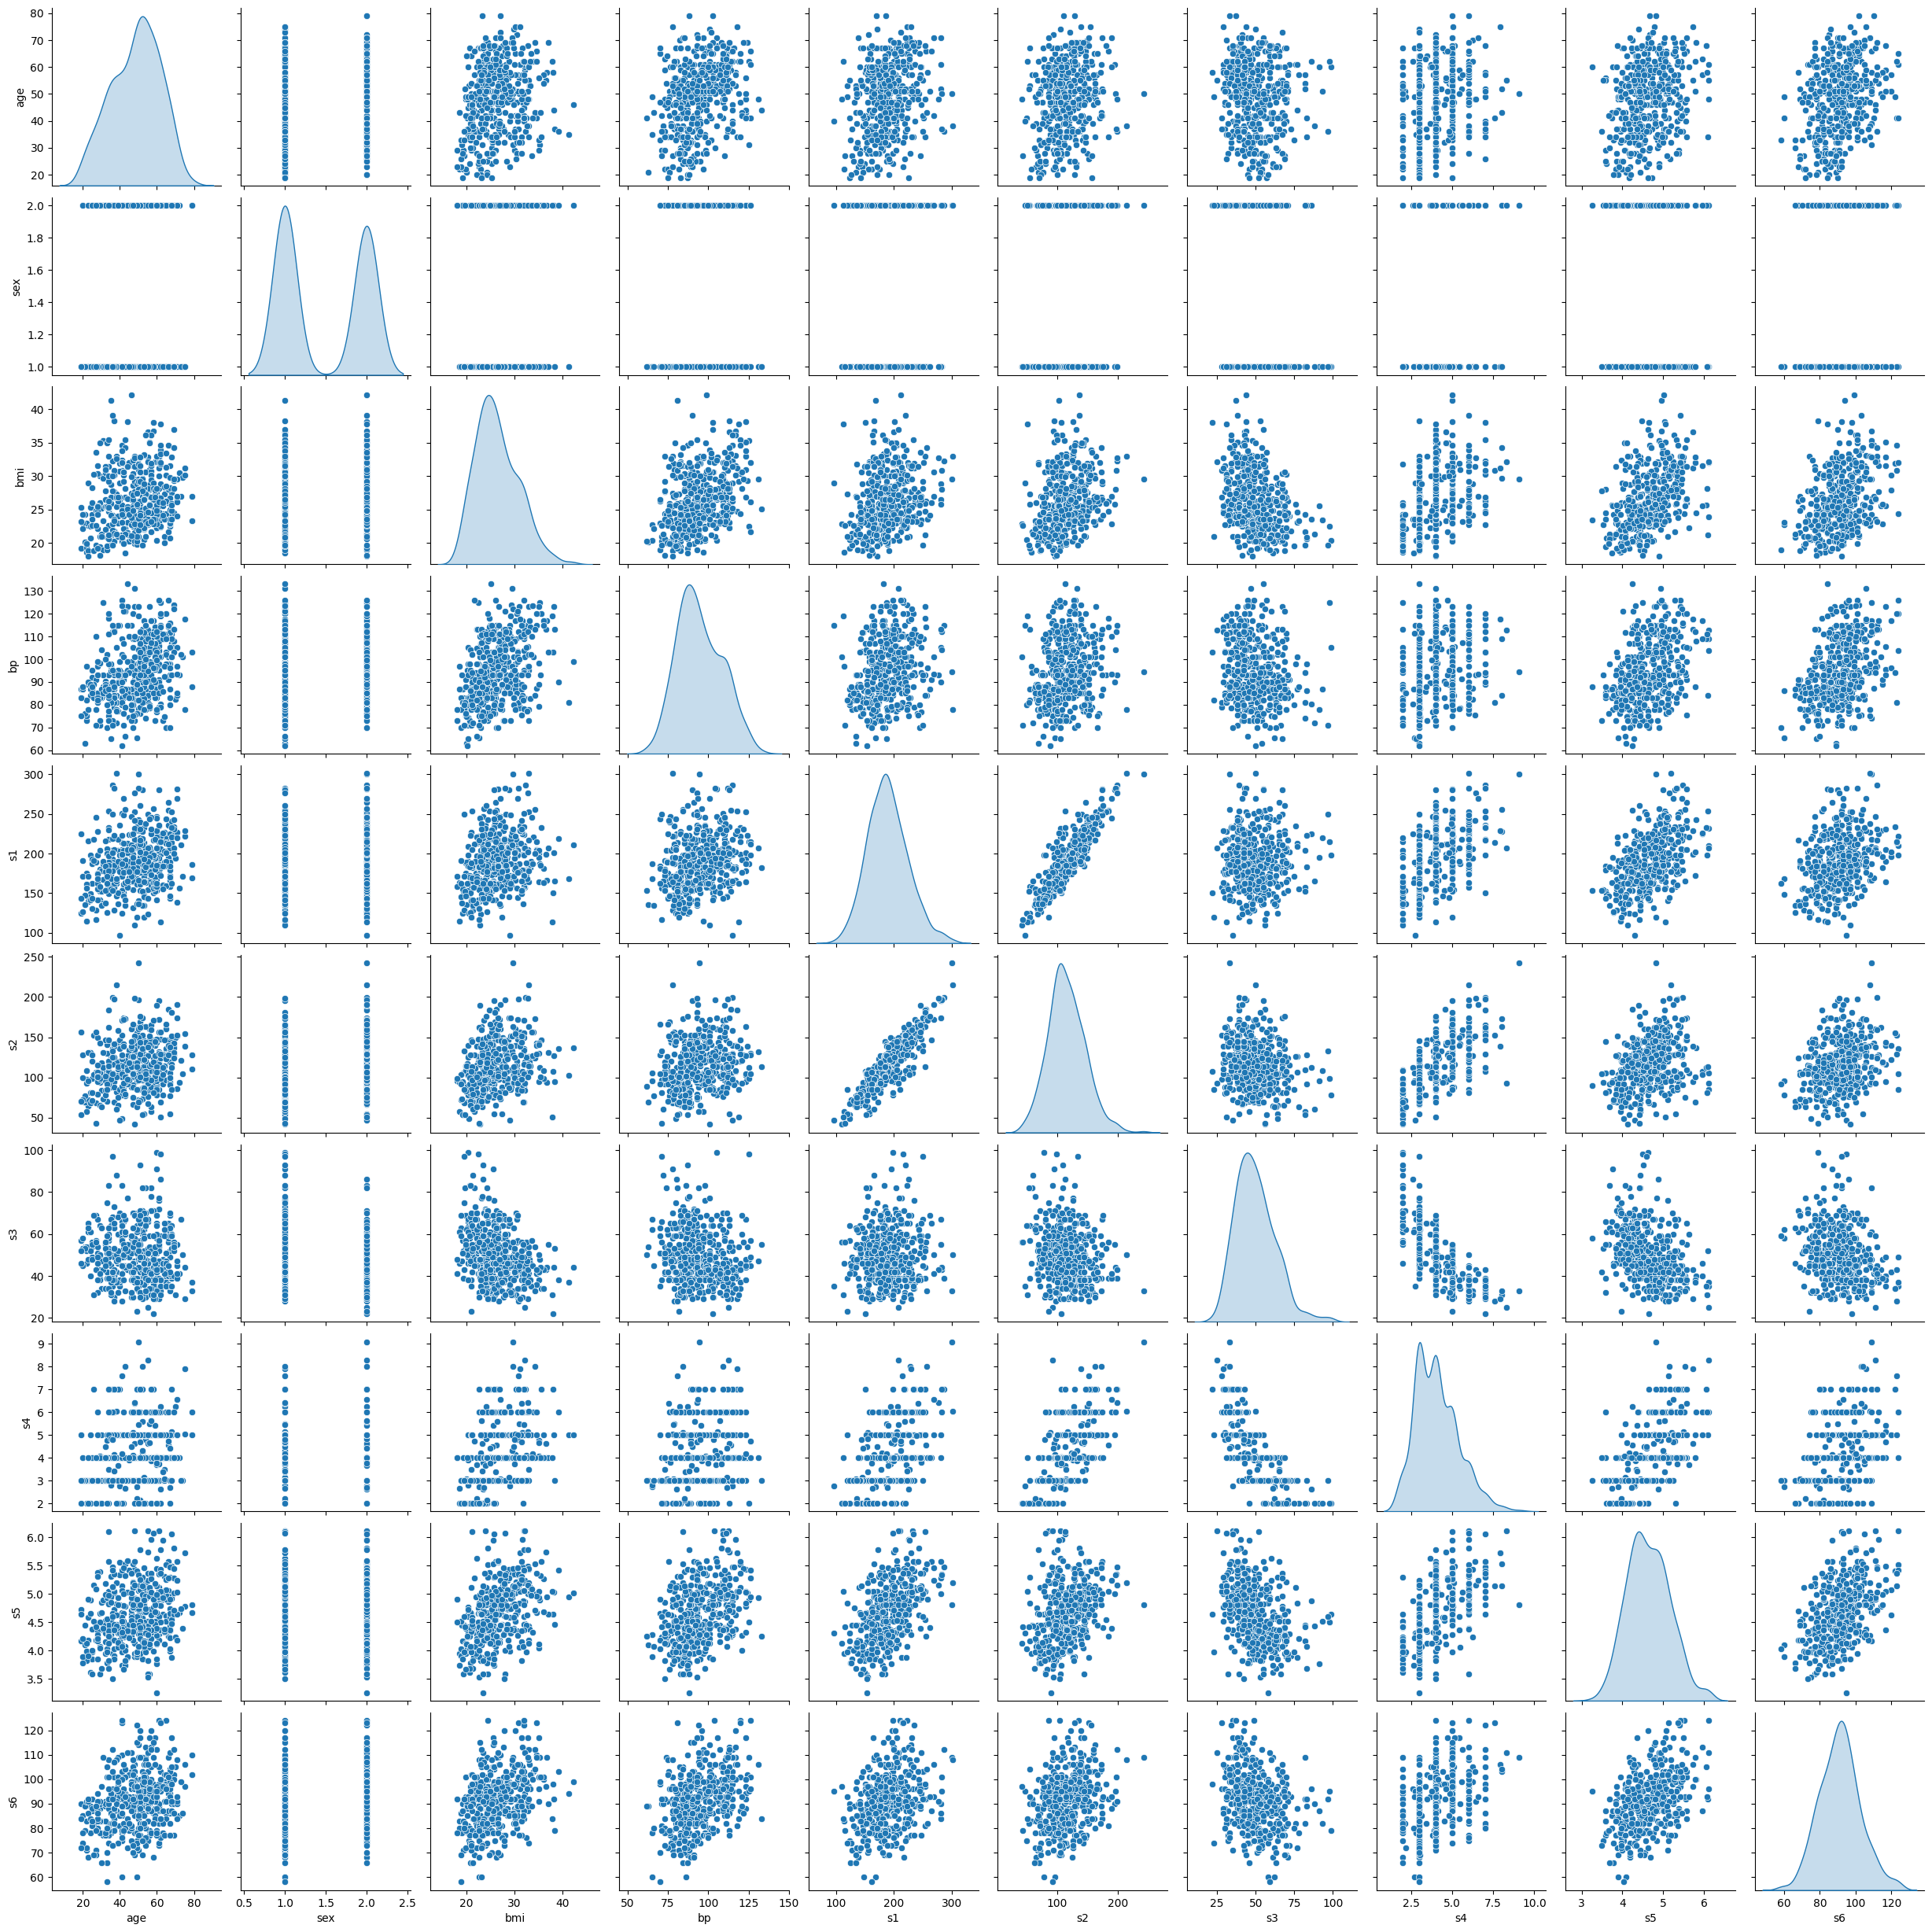

In [11]:
import seaborn as sns


sns.pairplot(patients_p, diag_kind="kde")

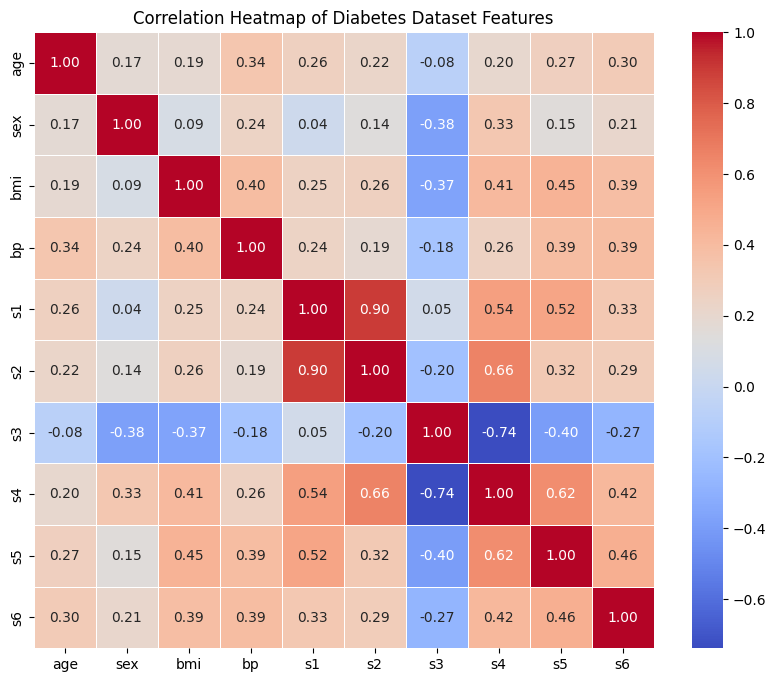

In [22]:
correlation_matrix = patients_p.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.show()

In [23]:
import statsmodels.api as sm
from sklearn import datasets

# Load the diabetes dataset
patients = datasets.load_diabetes()
patients_p = pd.DataFrame(patients.data, columns=patients.feature_names)
y = datasets.load_diabetes().target


X = sm.add_constant(patients_p) # add a constant vector, like with numpy

model = sm.OLS(y, X).fit()

print(model.summary()) # at p-value < 0.05, the model is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.83e-62
Time:                        12:51:21   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

### Data standardisation with [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [24]:
## if necessary to scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(patients['data'])

pd.DataFrame(scaled_data, columns=patients.feature_names).describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.698949,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040937,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681851,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722,2.851075e+00


### Data split into train and test batches with [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method

In [25]:
from sklearn.model_selection import train_test_split

patients_train_data, patients_test_data, \
patients_train_target, patients_test_target = \
train_test_split(patients['data'],patients['target'], test_size=0.1, random_state=10)
# train_test_split(scaled_data, patients['target'], test_size=0.1) <- don't do this, train and test should be seperate

In [26]:
print("Training dataset:")
print("patients_train_data:", patients_train_data.shape)
print("patients_train_target:", patients_train_target.shape)

Training dataset:
patients_train_data: (397, 10)
patients_train_target: (397,)


In [27]:
print("Testing dataset:")
print("patients_test_data:", patients_test_data.shape)
print("patients_test_target:", patients_test_target.shape)

Testing dataset:
patients_test_data: (45, 10)
patients_test_target: (45,)


## Learning
### Training [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model

In [28]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(patients_train_data)
scaled_test_data = scaler.transform(patients_test_data)

linear_regression.fit(scaled_train_data, patients_train_target)

LinearRegression()

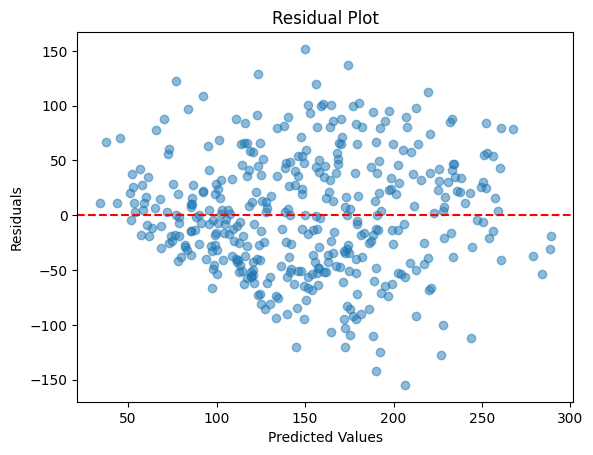

In [29]:
predictions = linear_regression.predict(scaled_train_data)
residuals = patients_train_target - predictions


plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

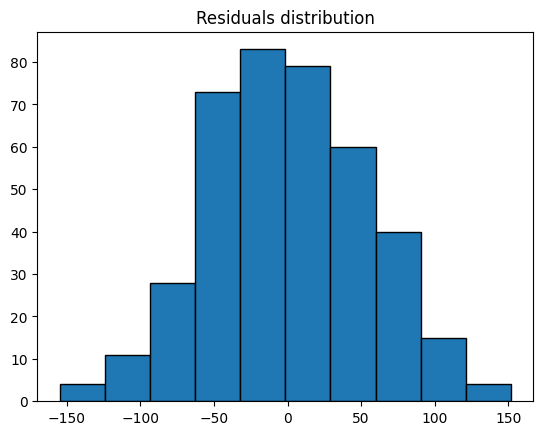

In [30]:
plt.hist(residuals, edgecolor='black')
plt.title("Residuals distribution")
plt.show()

In [31]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

alpha = 0.05  # 5% significance level
if p_value > alpha:
    print("Normal distribution according to S-W test.")
else:
    print("Residuals not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9963, p-value: 0.4785
Normal distribution according to S-W test.


## Model evaluation

In [32]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" %
      mean_squared_error(patients_test_target, linear_regression.predict(scaled_test_data)))

Mean squared error of a learned model: 2155.99


In [33]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error of a learned model: %.2f" %
      mean_absolute_error(patients_test_target, linear_regression.predict(scaled_test_data)))

Mean absolute error of a learned model: 36.32


In [34]:
np.min(patients_test_target), np.max(patients_test_target)

(np.float64(42.0), np.float64(308.0))

Determining [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) with [r2_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [35]:
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(patients_test_target, linear_regression.predict(scaled_test_data)))

R2: 0.64


### Model evaluation with [cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

![cross_validation.jpg](attachment:cross_validation.jpg)

fig. cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics))

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), patients['data'], patients['target'], cv=4)
print(scores)

[0.37459248 0.49678312 0.50950026 0.55755577]


## Prediction

In [37]:
id=1
linear_regression_prediction = linear_regression.predict(patients_test_data[id,:].reshape(1,-1))

#print(patients_test_data[id,:].shape)
#print(patients_test_data[id,:].reshape(1,-1).shape)

In [38]:
print("Model predicted for patient {0} value {1}".format(id, linear_regression_prediction))

Model predicted for patient 1 value [154.11062427]


In [39]:
print("Real value for patient \"{0}\" is {1}".format(id, patients_test_target[id]))

Real value for patient "1" is 202.0


In [40]:
linear_regression_predictions = linear_regression.predict(patients_test_data)
print(linear_regression_predictions)

[151.26854519 154.11062427 153.05532988 147.89834199 151.84750504
 149.96068818 150.11489786 156.55476753 147.96722212 147.79226298
 150.07692604 150.91085391 151.9733449  148.74637026 146.32818919
 154.65756048 150.95675806 149.40328216 153.74872984 147.7678756
 153.20948047 155.66935477 147.64571742 154.23379988 146.69156929
 151.69703746 151.6134271  151.56574285 152.13148477 149.15826557
 157.20138295 152.61109466 147.0643936  151.6149341  154.55558658
 152.77477464 147.36725838 152.88378102 157.37882123 153.43789031
 153.75252694 151.04778351 154.43113633 149.9600962  147.85261483]


In [41]:
print('Coefficients of a learned model: \n', linear_regression.coef_)

Coefficients of a learned model: 
 [ -0.78538283 -11.35390654  23.98817455  14.89729602 -37.05865727
  22.85420378   4.56997297   9.15835251  35.48583048   3.14958315]


### [Lasso regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model. A Model with [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))

In [42]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.3)
lasso_regression.fit(scaled_train_data, patients_train_target)
score = lasso_regression.score(scaled_test_data, patients_test_target) #r2 score
print("Lasso regression variance score: %.2f" % score)

Lasso regression variance score: 0.64


In [43]:
print('Coefficients of a learned model: \n', lasso_regression.coef_)

Coefficients of a learned model: 
 [ -0.07662871 -10.58254828  24.35905355  14.19909109  -8.11155793
   0.          -7.81797619   5.24097924  24.57957687   2.94928735]


## California housing market price prediction

TODO: write python script to train linear regression model that learn price estimation on california_housing data. Check learned model with mean squared error, mean absolute error and variance score (r2). Check predicted value for house with id=5 from test data. How this estimation differ from real value?
Plot residuals.

Hint: check for data values and perform standardisation if necessary.

In [44]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [45]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Mean Squared Error: 0.56
Mean Absolute Error: 0.54
R2 Score: 0.58
Predicted value for house 5: 2.02
Real value for house 5: 1.59


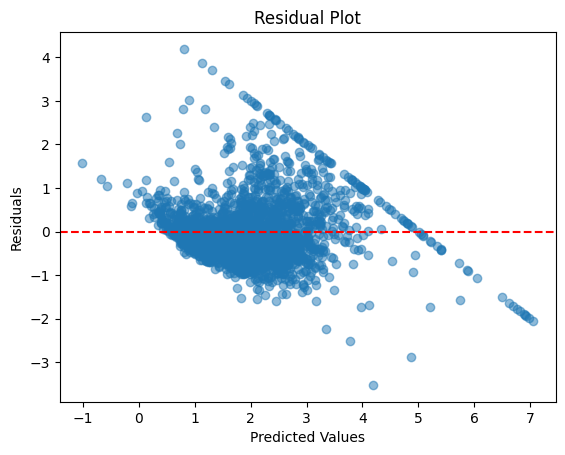

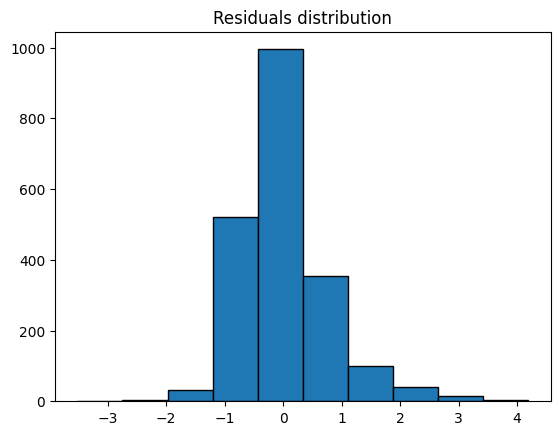

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# Load the California housing dataset
housing = fetch_california_housing()

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(housing.data, housing.target, test_size=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(scaled_train_data, train_target)

# Evaluate the model
predictions = linear_regression.predict(scaled_test_data)
mse = mean_squared_error(test_target, predictions)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# Check predicted value for house with id=5 from test data
house_id = 5
predicted_value = linear_regression.predict(scaled_test_data[house_id].reshape(1, -1))
real_value = test_target[house_id]

print(f"Predicted value for house {house_id}: {predicted_value[0]:.2f}")
print(f"Real value for house {house_id}: {real_value:.2f}")

# Plot residuals
residuals = test_target - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Plot residuals distribution
plt.hist(residuals, edgecolor='black')
plt.title("Residuals distribution")
plt.show()

# References
__ALL images (unless otherwise stated) are from book__: Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015, ISBN 1783555130